# Figures for the paper

In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline

In [48]:
import PIL.Image as Image
import pickle

In [49]:
with open("dis_baseline.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)

In [83]:
def plot_trace(data,t,ax=None,c='C0'):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    ax.plot(t,vtracso[:,250],c)
    ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
    ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    return(ax)

(0, 100)

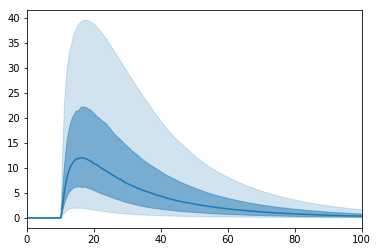

In [68]:
plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,c='C0')
xlim(0,100)

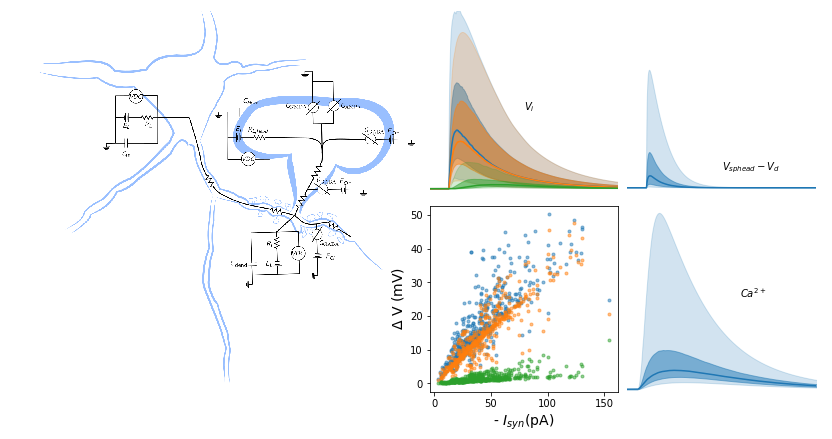

In [109]:
im = Image.open('../NeuronA.png')
height = im.size[1]
im = np.array(im).astype(np.float) / 255
fig = figure(figsize=(14,7))
gs = mpl.gridspec.GridSpec(2, 4,  wspace=0.05, hspace=0.05) # 2x3 grid
ax0 = fig.add_subplot(gs[:, 0:2]) # first full col
ax1 = fig.add_subplot(gs[0, 2]) # first row, second col
ax2 = fig.add_subplot(gs[0, 3]) # first row, third col
ax3 = fig.add_subplot(gs[1, 2]) # 2nd row, second col
ax4 = fig.add_subplot(gs[1, 3]) # 2nd row, 3rd col

ax0.imshow(im)
ax0.set_axis_off()
#ax2.imshow(im)
#ax3.imshow(im)
#ax4.imshow(im)
#ax5.imshow(im)
#ax1.imshow(im)
plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax1,c='C0')
plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,ax1,c='C1')
ax1.set_xlim(0,100)
ax1.set_ylim(-67,-20)
ax1.set_axis_off()
#plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,ax2,c='C1')
#plot_trace(vtracsS,arange(vtracsS.shape[0])*.1-200+10,ax2,c='C2')
ax1.text(50,20-65,"$V_{i}$")

plot_trace(vtracsS,arange(vtracsS.shape[0])*.1-200+10,ax1,c='C2')
#ax2.set_xlim(0,100)
#ax2.set_axis_off()
plot_trace(vtracs-vtracsD,arange(vtracs.shape[0])*.1-200+10,ax2,c='C0')
ax2.set_xlim(0,100)
ax2.set_axis_off()
ax2.set_ylim(-2,40)
ax2.text(50,4,"$V_{sp head} - V_{d}$")

plot_trace(Ctracs,arange(Ctracs.shape[0])*.1-200+10,ax4,c='C0')
ax4.set_xlim(0,200)
ax4.set_axis_off()
ax4.set_ylim(-0.1,8.0)
#ax3.set_ylim(-2,40)
#ax2.set_axis_off()
ax4.text(120,4,"$Ca^{2+}$")

sel = mes[:,-3].argsort()
ax3.plot(abs(mes[sel,-3]/1e-3),mes[sel,1]+65,'.',label="Spine head",alpha=0.5)
ax3.plot(abs(mes[sel,-3]/1e-3),mes[sel,2]+65,'.',label="Dendritic shaft",alpha=0.5)
ax3.plot(abs(mes[sel,-3]/1e-3),mes[sel,3]+65,'.',label="Soma",alpha=0.5)
ax3.set_xlabel("- $I_{syn}$(pA)",fontsize = 14)
ax3.set_ylabel("$\Delta$ V (mV)",fontsize = 14)

savefig("Figure_Model_1.png")

Figure 1. Panel a shows sketch of circuit model used for  ..... each compartment includes passive membrane properties, active conductances such as Voltage dependent Calcium currents, etc. Inside the spine, the model includes an excitatory synapse with both AMPA and NMDA currents and the possibility of having second innervation with a GABAergic synapse. Inhibitory synapses can be located in the dendritic shaft or in the spine neck as well. Panel b shows the depolarization produced in the membrane of the spine head (blue) and in the dendritic shaft (orange), when (only) glutamate release is simulated. Panel c shows the depolarization of the dendritic shaft and the soma in the same scenario. Panel d shows the amplitude of the depolarization in the ensemble of spines as a function of the amplitude of the current. Panel e shows the effects of the EPSP in the intracellular Calcium in the previous scenario (blue) and when NMDA currents is blocked (orange).  

In [ ]:
with open("dis_baseline.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
with open("dis_ga_glu.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
with open("dis_glu_ga.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
with open("sis_ga_glu.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
with open("sis_glu_ga.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)

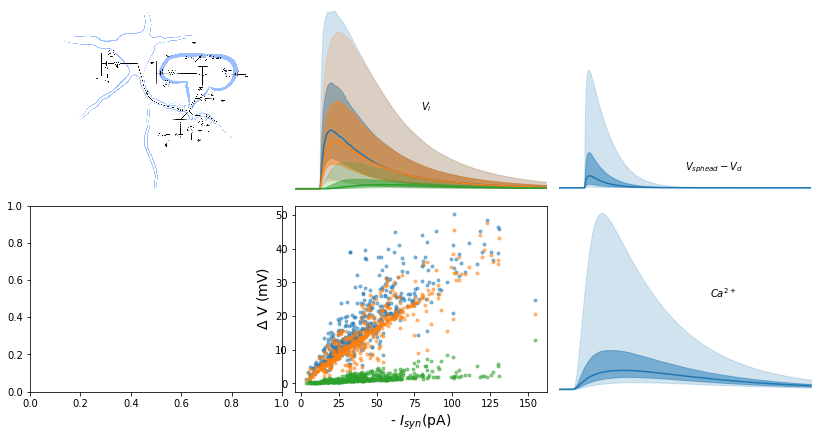

In [111]:
fig = figure(figsize=(14,7))
gs = mpl.gridspec.GridSpec(2, 3,  wspace=0.05, hspace=0.05) # 2x3 grid
ax0 = fig.add_subplot(gs[0, 0]) # first full col
ax0b = fig.add_subplot(gs[1, 0]) # first full col

ax1 = fig.add_subplot(gs[0, 1]) # first row, second col
ax2 = fig.add_subplot(gs[0, 2]) # first row, third col
ax3 = fig.add_subplot(gs[1, 1]) # 2nd row, second col
ax4 = fig.add_subplot(gs[1, 2]) # 2nd row, 3rd col

ax0.imshow(im)
ax0.set_axis_off()
#ax2.imshow(im)
#ax3.imshow(im)
#ax4.imshow(im)
#ax5.imshow(im)
#ax1.imshow(im)
plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax1,c='C0')
plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,ax1,c='C1')
ax1.set_xlim(0,100)
ax1.set_ylim(-67,-20)
ax1.set_axis_off()
#plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,ax2,c='C1')
#plot_trace(vtracsS,arange(vtracsS.shape[0])*.1-200+10,ax2,c='C2')
ax1.text(50,20-65,"$V_{i}$")

plot_trace(vtracsS,arange(vtracsS.shape[0])*.1-200+10,ax1,c='C2')
#ax2.set_xlim(0,100)
#ax2.set_axis_off()
plot_trace(vtracs-vtracsD,arange(vtracs.shape[0])*.1-200+10,ax2,c='C0')
ax2.set_xlim(0,100)
ax2.set_axis_off()
ax2.set_ylim(-2,40)
ax2.text(50,4,"$V_{sp head} - V_{d}$")

plot_trace(Ctracs,arange(Ctracs.shape[0])*.1-200+10,ax4,c='C0')
ax4.set_xlim(0,200)
ax4.set_axis_off()
ax4.set_ylim(-0.1,8.0)
#ax3.set_ylim(-2,40)
#ax2.set_axis_off()
ax4.text(120,4,"$Ca^{2+}$")

sel = mes[:,-3].argsort()
ax3.plot(abs(mes[sel,-3]/1e-3),mes[sel,1]+65,'.',label="Spine head",alpha=0.5)
ax3.plot(abs(mes[sel,-3]/1e-3),mes[sel,2]+65,'.',label="Dendritic shaft",alpha=0.5)
ax3.plot(abs(mes[sel,-3]/1e-3),mes[sel,3]+65,'.',label="Soma",alpha=0.5)
ax3.set_xlabel("- $I_{syn}$(pA)",fontsize = 14)
ax3.set_ylabel("$\Delta$ V (mV)",fontsize = 14)

savefig("Figure_Model_2.png")